In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/CombinedSalesData 2009-2011.xlsx'
try:

    df = pd.read_excel(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August


In [ ]:

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month,TotalRevenue
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46


In [ ]:
customer_data = df.groupby('Customer ID').agg({
    'TotalRevenue': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

customer_data['AvgRevenuePerTransaction'] = customer_data['TotalRevenue'] / customer_data['InvoiceNo']
average_customer_lifespan = 1
customer_data['CLV'] = customer_data['AvgRevenuePerTransaction'] * customer_data['InvoiceNo'] * average_customer_lifespan

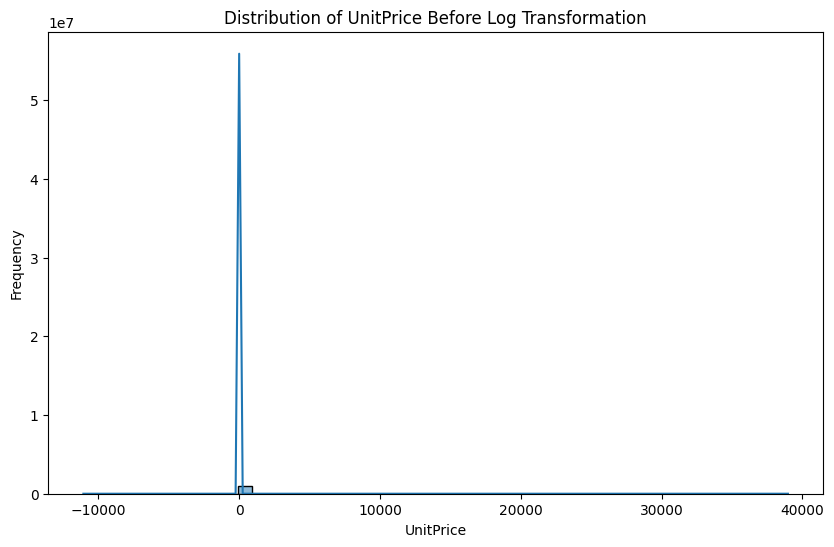

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



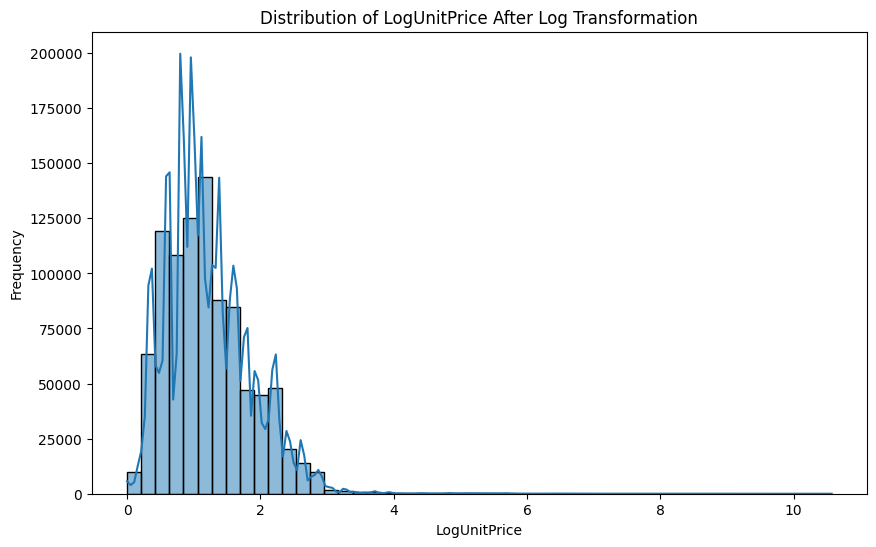

In [ ]:

# Check the distribution of UnitPrice before transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice Before Log Transformation')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation
# Adding 1 to avoid log(0), which is undefined
df['LogUnitPrice'] = np.log(df['UnitPrice'] + 1)

# Check the distribution of LogUnitPrice after transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['LogUnitPrice'], bins=50, kde=True)
plt.title('Distribution of LogUnitPrice After Log Transformation')
plt.xlabel('LogUnitPrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month,TotalRevenue,LogUnitPrice
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269


In [ ]:
df['LogTotalRevenue'] = df['Quantity'] * df['LogUnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month,TotalRevenue,LogUnitPrice,LogTotalRevenue
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269,1.241269
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269,1.241269
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269,1.241269
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269,1.241269
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46,1.241269,1.241269


In [ ]:
# Analyze factors affecting CLV
correlation_matrix = customer_data.corr()

In [ ]:
customer_data.head()

,Customer ID,TotalRevenue,InvoiceNo,AvgRevenuePerTransaction,CLV
0,12346.0,-51.74,47,-1.100851,-51.74
1,12347.0,4921.53,222,22.169054,4921.53
2,12348.0,2019.40,51,39.596078,2019.40
3,12349.0,4404.54,180,24.469667,4404.54
4,12350.0,334.40,17,19.670588,334.40


In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px  # Plotly version >= 5.0
import ast

In [ ]:
customer_data['Count'] = 1

In [ ]:
fig = px.sunburst(customer_data, path=['Customer ID', 'CLV'], values='CLV', template="plotly_dark")
fig.update_layout(title_text='Disease', title_x=0.5)
fig.show()

In [ ]:
customer_data = df.groupby('Customer ID').agg({
    'LogTotalRevenue': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

customer_data['AvgRevenuePerTransaction'] = customer_data['LogTotalRevenue'] / customer_data['InvoiceNo']
average_customer_lifespan = 1
customer_data['CLV'] = customer_data['AvgRevenuePerTransaction'] * customer_data['InvoiceNo'] * average_customer_lifespan

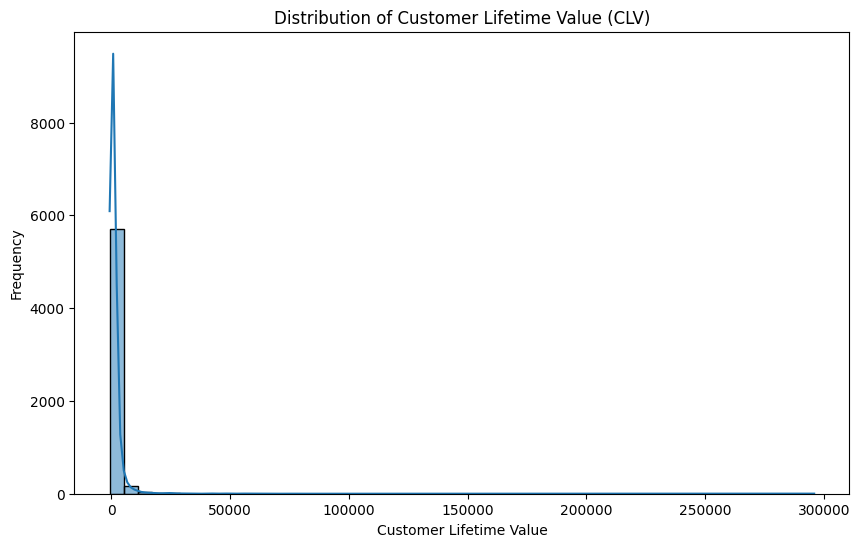

In [ ]:
# Plot the distribution of CLV
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['CLV'], bins=50, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()


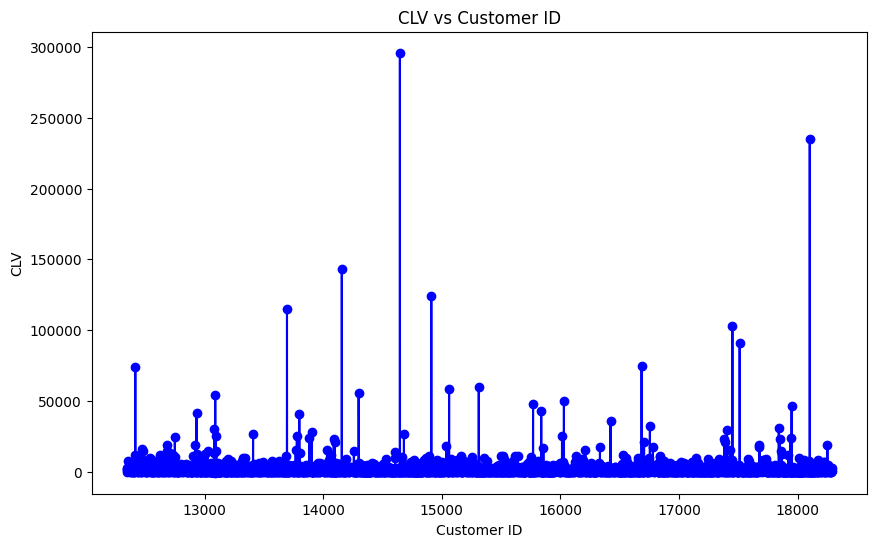

In [ ]:
# Plot Quantity vs TotalRevenue
plt.figure(figsize=(10, 6))
plt.plot(customer_data['Customer ID'], customer_data['CLV'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('CLV vs Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('CLV')

# Show plot
plt.show()


In [ ]:
# Sort customers by CLV in descending order
top_customers = customer_data.sort_values(by='CLV', ascending=False).head(10)


In [ ]:
# Print the top 10 customers with their Customer ID and CLV
print("Top 10 Customers by CLV:")
print(top_customers[['Customer ID', 'CLV']])


Top 10 Customers by CLV:
      Customer ID            CLV
2300      14646.0  295979.003331
5756      18102.0  234909.284438
1810      14156.0  143166.879194
2565      14911.0  124355.302446
1348      13694.0  114870.920470
5104      17450.0  102786.414044
5165      17511.0   91065.659933
4338      16684.0   74804.723216
69        12415.0   74245.447687
2965      15311.0   59716.069112


In [ ]:
top_customers.head(10)

,Customer ID,LogTotalRevenue,InvoiceNo,AvgRevenuePerTransaction,CLV
2300,14646.0,295979.003331,3890,76.087147,295979.003331
5756,18102.0,234909.284438,1050,223.723128,234909.284438
1810,14156.0,143166.879194,4118,34.766119,143166.879194
2565,14911.0,124355.302446,11444,10.866419,124355.302446
1348,13694.0,114870.920470,1551,74.062489,114870.920470
5104,17450.0,102786.414044,444,231.500933,102786.414044
5165,17511.0,91065.659933,2077,43.844805,91065.659933
4338,16684.0,74804.723216,749,99.872795,74804.723216
69,12415.0,74245.447687,990,74.995402,74245.447687
2965,15311.0,59716.069112,4579,13.041290,59716.069112


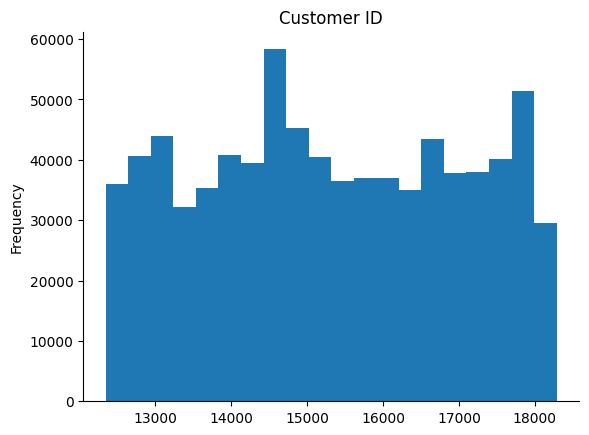

In [ ]:
from matplotlib import pyplot as plt
df['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)